In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df = df.drop(columns=['Species'])

In [8]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [20]:
X = df[['PetalLengthCm','PetalWidthCm']]
X

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


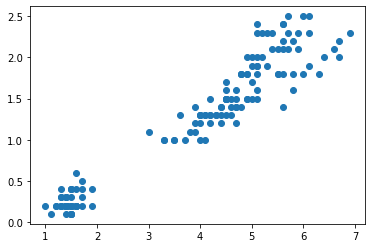

In [10]:
#plot the scatter plot

plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'])

# Elbow method
to find the k value

In [14]:
k_rng = range(1,10)
wcss=[]

for k in k_rng :
    km = KMeans(n_clusters = k)
    km.fit(df[['PetalLengthCm','PetalWidthCm']])
    wcss.append(km.inertia_)
    

C:\Users\suyash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
wcss

[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 19.499400899685114,
 13.999613141025645,
 11.10362366260479,
 9.329296073517122,
 7.631802244955954,
 6.530632636644399]

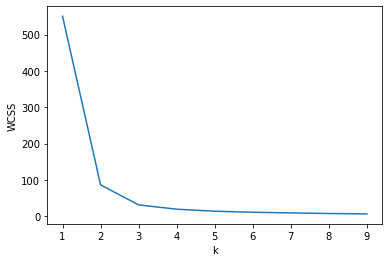

In [17]:
plt.xlabel('k')
plt.ylabel('WCSS')
plt.plot(k_rng, wcss)

#here we get the elbow = 3 so we got k = 3

In [35]:
# here we got the 3 cluster
df.Cluster.unique()

array([1, 2, 0])

# K_mean

In [21]:
km = KMeans(n_clusters = 3)

In [22]:
km

KMeans(n_clusters=3)

In [23]:
y_pred = km.fit_predict(df[['PetalLengthCm', 'PetalWidthCm']])

In [24]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
df['Cluster/ Species'] = y_pred

In [28]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster,Cluster/ Species
0,1,5.1,3.5,1.4,0.2,1,1
1,2,4.9,3.0,1.4,0.2,1,1
2,3,4.7,3.2,1.3,0.2,1,1
3,4,4.6,3.1,1.5,0.2,1,1
4,5,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0
146,147,6.3,2.5,5.0,1.9,0,0
147,148,6.5,3.0,5.2,2.0,0,0
148,149,6.2,3.4,5.4,2.3,0,0


In [29]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster,Cluster/ Species
0,1,5.1,3.5,1.4,0.2,1,1
1,2,4.9,3.0,1.4,0.2,1,1
2,3,4.7,3.2,1.3,0.2,1,1
3,4,4.6,3.1,1.5,0.2,1,1
4,5,5.0,3.6,1.4,0.2,1,1


# Plotting the cluster

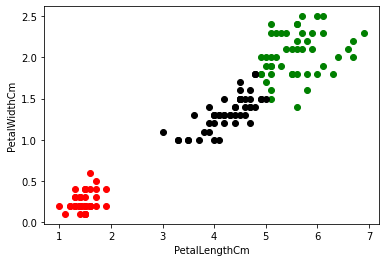

In [32]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster  == 2]

plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'], color = 'green')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'], color = 'red')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'], color = 'black')

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

plt.show()

 as we see the black and gree cluster is not group well because of scaling is not right so used the min_max scale

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
scaler.fit(df[['PetalWidthCm']])
df['PetalWidthCm'] = scaler.transform(df[['PetalWidthCm']])

scaler.fit(df[['PetalLengthCm']])
df['PetalLengthCm'] = scaler.transform(df[['PetalLengthCm']])

In [39]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster,Cluster/ Species
0,1,5.1,3.5,0.067797,0.041667,1,1
1,2,4.9,3.0,0.067797,0.041667,1,1
2,3,4.7,3.2,0.050847,0.041667,1,1
3,4,4.6,3.1,0.084746,0.041667,1,1
4,5,5.0,3.6,0.067797,0.041667,1,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,0.711864,0.916667,0,0
146,147,6.3,2.5,0.677966,0.750000,0,0
147,148,6.5,3.0,0.711864,0.791667,0,0
148,149,6.2,3.4,0.745763,0.916667,0,0


In [40]:
km = KMeans(n_clusters = 3)

In [41]:
y_pred = km.fit_predict(df[['PetalLengthCm', 'PetalWidthCm']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
df['Cluster'] = y_pred

In [43]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster,Cluster/ Species
0,1,5.1,3.5,0.067797,0.041667,1,1
1,2,4.9,3.0,0.067797,0.041667,1,1
2,3,4.7,3.2,0.050847,0.041667,1,1
3,4,4.6,3.1,0.084746,0.041667,1,1
4,5,5.0,3.6,0.067797,0.041667,1,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,0.711864,0.916667,2,0
146,147,6.3,2.5,0.677966,0.750000,2,0
147,148,6.5,3.0,0.711864,0.791667,2,0
148,149,6.2,3.4,0.745763,0.916667,2,0


# Ploting the kmean

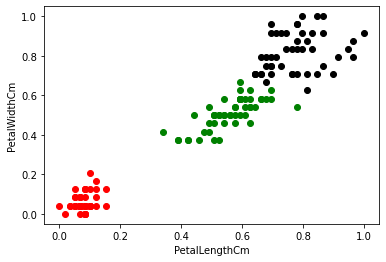

In [44]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster  == 2]

plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'], color = 'green')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'], color = 'red')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'], color = 'black')

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

plt.show()

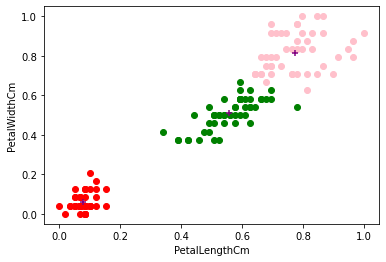

In [49]:
#plots the centroids

df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster  == 2]

plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'], color = 'green')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'], color = 'red')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'], color = 'pink')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker ="+", label ="centroid")

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

plt.show()


In [51]:
print("Cluster centers:")
print(km.cluster_centers_)

Cluster centers:
[[0.55867014 0.51041667]
 [0.07864407 0.06      ]
 [0.7740113  0.81510417]]


# Check new data points

In [79]:
new_data_points = np.array([[0.06779,0.041667]])

In [80]:
predicted_cluster = km.predict(new_data_point)

In [84]:
print("The new data point belongs to cluster", predicted_cluster[0])

The new data point belongs to cluster 2


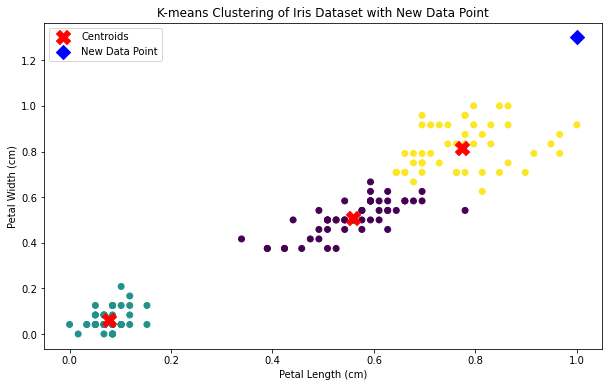

In [75]:
#plot
plt.figure(figsize=(10, 6))
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.scatter(new_data_point[0, 0], new_data_point[0, 1], s=100, c='blue', label='New Data Point', marker='D')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-means Clustering of Iris Dataset with New Data Point')
plt.legend()
plt.show()